# Decison Tree, Support Vector Machine and Random Forest Regression.
# DARSHAN R
# ENG22CS1024

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/healthcare-dataset-stroke-data.csv')

In [162]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# data preprocesssing

In [163]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [165]:
# Assuming 'age' column is initially stored as another data type (e.g., float or object)
df['age'] = df['age'].astype(int)

In [167]:
df.isnull().sum()/df.shape[0]*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

<Axes: xlabel='stroke', ylabel='age'>

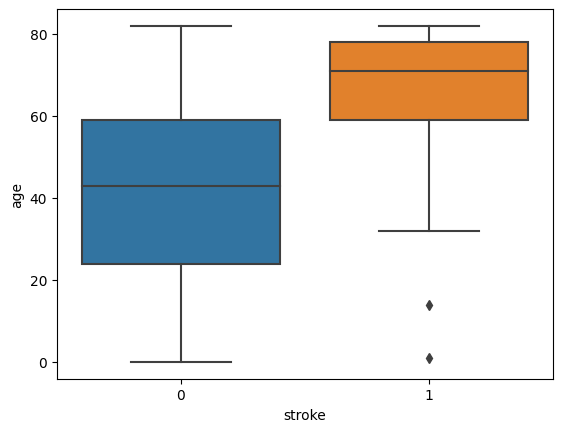

In [168]:
sns.boxplot(data=df, x="stroke", y="age")

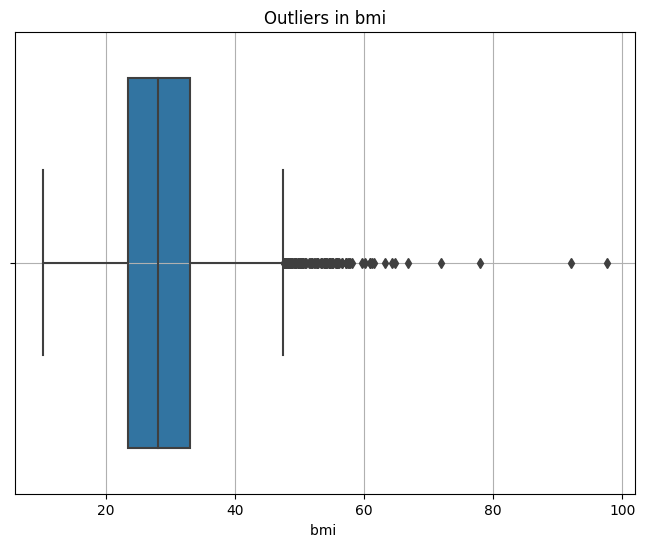

In [169]:
# Visualize outliers in bmi
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='bmi')
plt.title("Outliers in bmi")
plt.xlabel("bmi ")
plt.grid(True)
plt.show()

#  Label encoding
 Converting categorical data to numeric

In [170]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['avg_glucose_level'] = label_encoder.fit_transform(df['avg_glucose_level'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])
print("\nLabel Encoded Data:")
print(df)


Label Encoded Data:
         id  gender  age  hypertension  heart_disease  ever_married  \
0      9046       1   67             0              1             1   
1     51676       0   61             0              0             1   
2     31112       1   80             0              1             1   
3     60182       0   49             0              0             1   
4      1665       0   79             1              0             1   
...     ...     ...  ...           ...            ...           ...   
5105  18234       0   80             1              0             1   
5106  44873       0   81             0              0             1   
5107  19723       0   35             0              0             1   
5108  37544       1   51             0              0             1   
5109  44679       0   44             0              0             1   

      work_type  Residence_type  avg_glucose_level   bmi  smoking_status  \
0             2               1               3850

In [171]:
df.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000
mean,36517.829354,0.414286,43.215264,0.097456,0.054012,0.656164,2.167710,0.508023,1883.219961,28.893237,1.376908,0.048728
std,21161.721625,0.493044,22.633866,0.296607,0.226063,0.475034,1.090293,0.499985,1104.935189,7.854067,1.071534,0.215320
min,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.300000,0.000000,0.000000
25%,17741.250000,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,969.250000,23.500000,0.000000,0.000000
50%,36932.000000,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1811.500000,28.100000,2.000000,0.000000
75%,54682.000000,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,2786.000000,33.100000,2.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,3978.000000,97.600000,3.000000,1.000000


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   int64  
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 479.2 KB


In [173]:
cul=['age','work_type','avg_glucose_level','bmi']

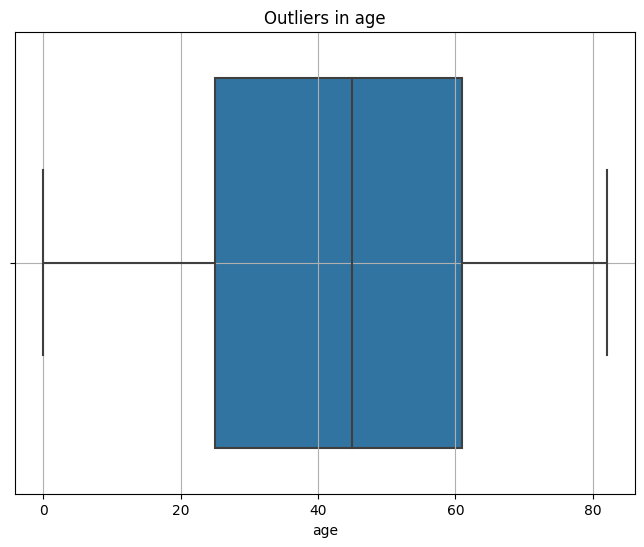

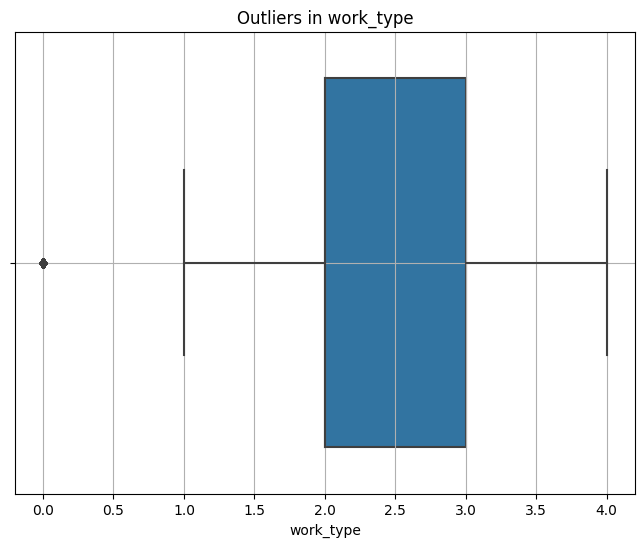

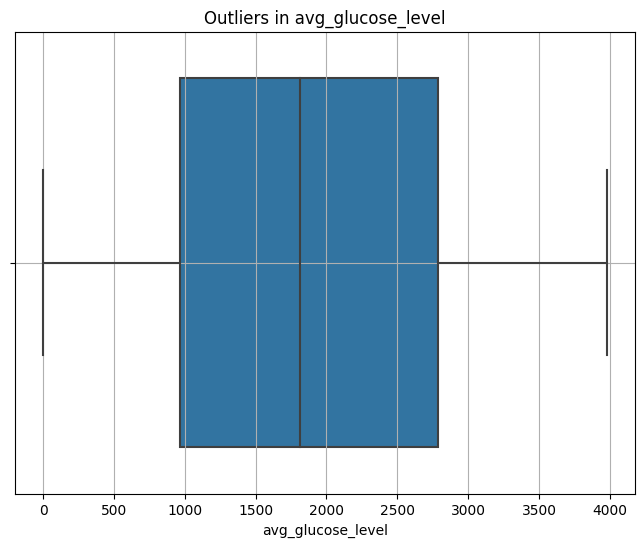

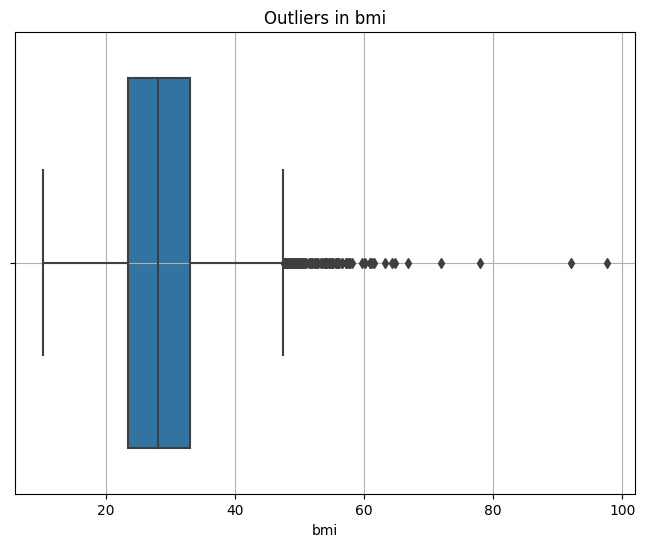

In [174]:
for i in cul:
  # Visualize outliers dataset
  plt.figure(figsize=(8, 6))
  sns.boxplot(data=df, x=i)
  plt.title(f"Outliers in {i}")
  plt.xlabel(i)
  plt.grid(True)
  plt.show()
  print("\n")

In [175]:
df['avg_glucose_level'].describe()

count    5110.000000
mean     1883.219961
std      1104.935189
min         0.000000
25%       969.250000
50%      1811.500000
75%      2786.000000
max      3978.000000
Name: avg_glucose_level, dtype: float64

In [176]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67,0,1,1,2,1,3850,36.6,1,1
1,51676,0,61,0,0,1,3,0,3588,NaN,2,1
2,31112,1,80,0,1,1,2,0,2483,32.5,2,1
3,60182,0,49,0,0,1,2,1,3385,34.4,3,1
4,1665,0,79,1,0,1,3,0,3394,24.0,2,1


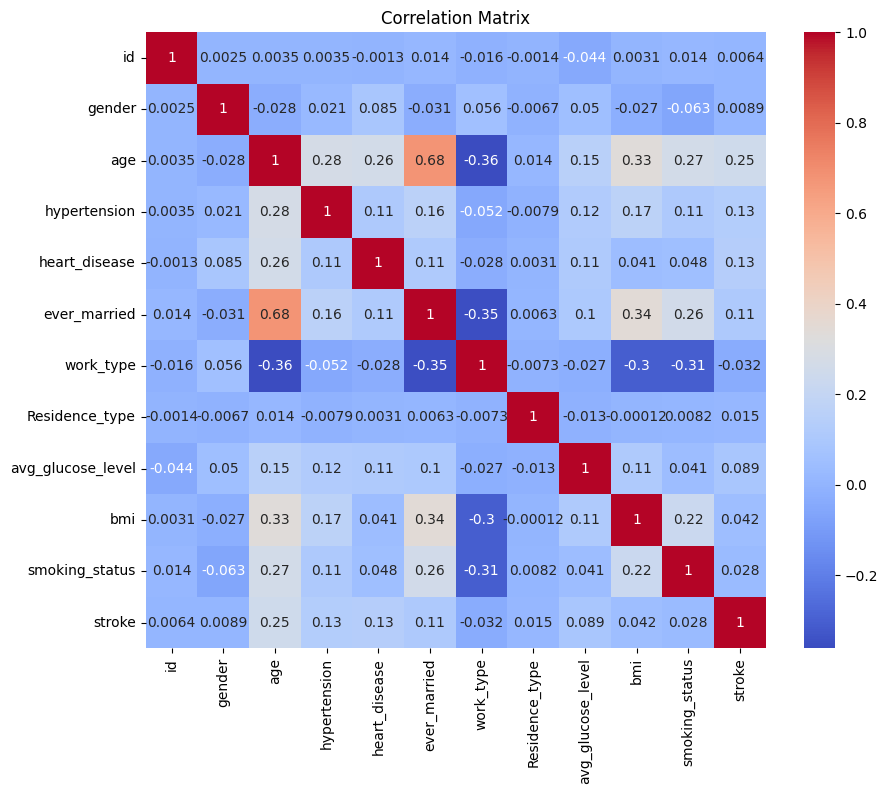

In [177]:
# Visualize correlation matrix
corr=df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

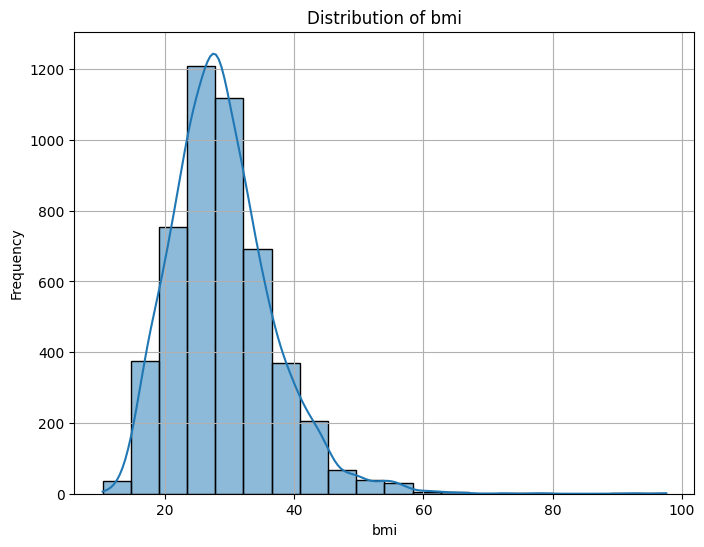

In [178]:
# Visualize the distribution of house prices
plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'], bins=20, kde=True)
plt.title("Distribution of bmi")
plt.xlabel("bmi")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [179]:
#filling null values with median of that column
df.bmi.fillna(df.bmi.median(),inplace=True)

In [186]:
df.drop('id',axis=1,inplace=True)
df.drop('avg_glucose_level',axis=1,inplace=True)

In [188]:
df.isnull().sum()

gender            0
age               0
hypertension      0
heart_disease     0
ever_married      0
work_type         0
Residence_type    0
bmi               0
smoking_status    0
stroke            0
dtype: int64

# Define features and target

In [189]:

feature = df.drop('stroke', axis=1)
target = df['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)


In [190]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

# handling imbalance data using oversamling

In [191]:
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, k_neighbors=5)
X_res, y_res = sm.fit_resample(feature,target)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3, random_state = 42)

In [192]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,36.6,1,1
1,0,61,0,0,1,3,0,28.1,2,1
2,1,80,0,1,1,2,0,32.5,2,1
3,0,49,0,0,1,2,1,34.4,3,1
4,0,79,1,0,1,3,0,24.0,2,1


# DecisionTreeClassifier

In [193]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
X_train= st_x.fit_transform(X_train)
X_test= st_x.transform(X_test)

#Fitting Decision Tree classifier to the training set
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
#"criterion='entropy': Criterion is used to measure the quality of split, which is calculated by information gain given by entropy.
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_DTC = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_DTC)
conf_matrix = confusion_matrix(y_test,y_pred_DTC)

print(f'\nAccuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print("\n",classification_report(y_test,y_pred_DTC))




Accuracy: 0.89

Confusion Matrix:
[[1258  199]
 [ 109 1351]]

               precision    recall  f1-score   support

           0       0.92      0.86      0.89      1457
           1       0.87      0.93      0.90      1460

    accuracy                           0.89      2917
   macro avg       0.90      0.89      0.89      2917
weighted avg       0.90      0.89      0.89      2917



[Text(0.4805763646175987, 0.9761904761904762, 'x[1] <= 67.5\ngini = 0.087\nsamples = 4088\nvalue = [3901, 187]'),
 Text(0.20361649362664475, 0.9285714285714286, 'x[1] <= 47.5\ngini = 0.043\nsamples = 3396\nvalue = [3322, 74]'),
 Text(0.06928453947368421, 0.8809523809523809, 'x[7] <= 56.3\ngini = 0.01\nsamples = 2211\nvalue = [2200, 11]'),
 Text(0.047286184210526314, 0.8333333333333334, 'x[1] <= 37.5\ngini = 0.009\nsamples = 2202\nvalue = [2192, 10]'),
 Text(0.013157894736842105, 0.7857142857142857, 'x[7] <= 28.05\ngini = 0.004\nsamples = 1620\nvalue = [1617, 3]'),
 Text(0.009868421052631578, 0.7380952380952381, 'gini = 0.0\nsamples = 1080\nvalue = [1080, 0]'),
 Text(0.01644736842105263, 0.7380952380952381, 'x[1] <= 1.5\ngini = 0.011\nsamples = 540\nvalue = [537, 3]'),
 Text(0.006578947368421052, 0.6904761904761905, 'x[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.003289473684210526, 0.6428571428571429, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.00986842105263

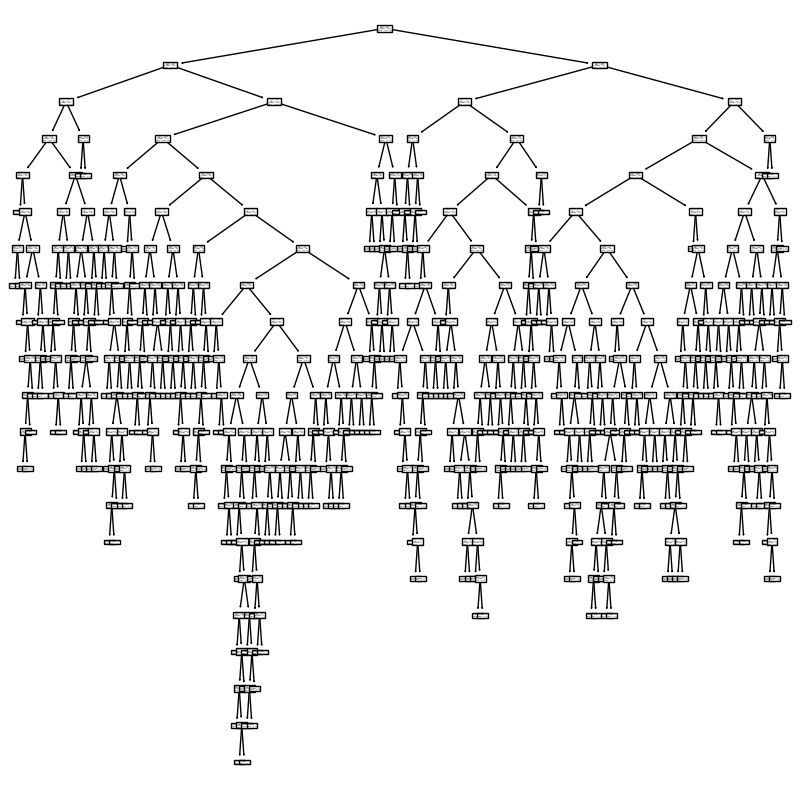

In [225]:
from sklearn import tree
plt.figure(figsize=(10,10))

tree.plot_tree(classifier.fit(X_train,y_train))

In [ ]:
# Visualising the graph without the use of graphvizplt.figure(figsize = (10,10))
dec_tree = tree.plot_tree(decision_tree=classifier, feature_names = feature.columns,
                     class_names =['1','0'] , filled = True , precision = 4, rounded = True)

# Support Vector Machine

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Train the Support Vector Classifier
svc = SVC(kernel='linear')  # Use a linear kernel for simplicity
svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_SVC = svc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_SVC)
conf_matrix = confusion_matrix(y_test, y_pred_SVC)

print(f'\nAccuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print("\n",classification_report(y_test,y_pred_SVC))



Accuracy: 0.94

Confusion Matrix:
[[960   0]
 [ 62   0]]

               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# RandomForestClassifier

In [195]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest Classifier
randomclassifier=RandomForestClassifier()
randomclassifier.fit(X_train,y_train)

# Make predictions on the test set
y_pred_test_RFC=randomclassifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_test_RFC)
conf_matrix = confusion_matrix(y_test, y_pred_test_RFC)

print(f'\nAccuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print("\n",classification_report(y_test,y_pred_test_RFC))


Accuracy: 0.93

Confusion Matrix:
[[1325  132]
 [  76 1384]]

               precision    recall  f1-score   support

           0       0.95      0.91      0.93      1457
           1       0.91      0.95      0.93      1460

    accuracy                           0.93      2917
   macro avg       0.93      0.93      0.93      2917
weighted avg       0.93      0.93      0.93      2917



In [196]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,36.6,1,1
1,0,61,0,0,1,3,0,28.1,2,1
2,1,80,0,1,1,2,0,32.5,2,1
3,0,49,0,0,1,2,1,34.4,3,1
4,0,79,1,0,1,3,0,24.0,2,1


In [213]:
classifier.predict([[1,67,0,1,1,2,1,36.6,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [219]:
classifier.predict([[1,67,0,1,1,2,1,36.6,1]])

array([0])

In [224]:
classifier.predict([[0,27,0,0,0,2,0,36.6,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [228]:
randomclassifier.predict([[1,80,1,1,1,2,1,36.6,2]])

array([0])

In [227]:
svc.predict([[1,27.0,0,0,0,1,1,26.6,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [222]:
svc.predict([[1,80,1,1,1,2,1,36.6,2]])

array([1])

In [201]:
randomclassifier.predict([[0,21,0,0,0,2,1,36.6,1]])

array([0])

In [202]:
randomclassifier.predict([[1,80,1,1,1,2,1,36.6,2]])

array([0])